In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from dataloader import load_csv
from matplotlib import pyplot
from math import ceil

In [2]:

def get_statistics(data: pd.DataFrame, columns):
    for col in columns:
        print(f"{ 20 * '-' + col + 20 * '-'}")
        print(f"Max: {data[col].max()}")
        print(f"Min: {data[col].min()}")
        print(f"Avg: {data[col].mean()}")
        print(f"std: {data[col].std()}\n")
        
def visualize_data(data: pd.DataFrame, columns, fig_columns=2):
    fig_rows = ceil(len(columns) / fig_columns)
    fig, axs = plt.subplots(fig_rows, fig_columns, figsize=(fig_columns * 5, fig_rows * 5))

    for (ax, col) in zip(axs.flat, columns):
        ax.set_title(col)
        ax.boxplot(data[col].dropna(), showmeans=True)

    for ax in axs.flat[len(columns):]:
        ax.set_title("Intentionally empty")


def get_value_counts(data: pd.DataFrame, columns):
    columns = sorted(columns, key=lambda col: data[col].isnull().sum(), reverse=True)
    for col in columns:
        print(f"{ 20 * '-' + col + 20 * '-'}")
        print(data[col].value_counts().head())
        print("Unique values:", len(data[col].value_counts()))
        print("Null:", data[col].isnull().sum())
        print("NaN:", data[col].isna().sum())




In [3]:
data = load_csv()

C:\Users\larsm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


--------------------SalePrice--------------------
Max: 142000.0
Min: 4750.0
Avg: 31215.181414012186
std: 23141.743694952158

--------------------YearMade--------------------
Max: 2014
Min: 1000
Avg: 1899.049636780406
std: 292.1902426512322

--------------------MachineHoursCurrentMeter--------------------
Max: 2483300.0
Min: 0.0
Avg: 3522.988285063456
std: 27169.92864998757



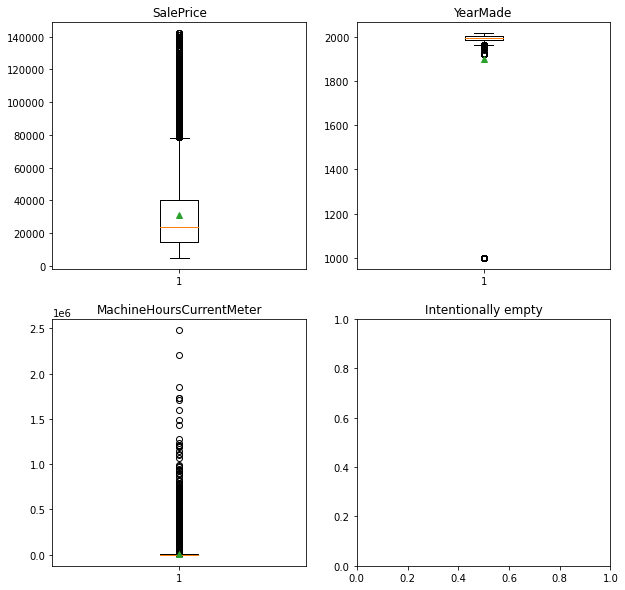

In [4]:

columns = ["SalePrice", "YearMade", "MachineHoursCurrentMeter"]


get_statistics(data, columns)
visualize_data(data, columns)

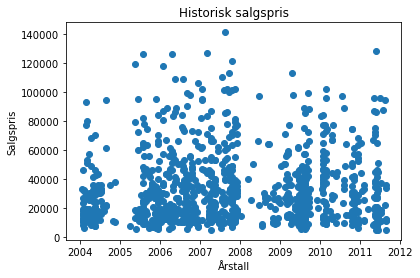

In [16]:
fig, ax = plt.subplots()
ax.scatter(data["saledate"][:1000], data["SalePrice"][:1000])
ax.set_title("Historisk salgspris")
ax.set_xlabel("Årstall")
ax.set_ylabel("Salgspris")
plt.show()

# Manglende verdier

Under viser get_value_counts de vanligste verdiene i hver kolonne, sortert etter antall null verdier

Vi ser at i svært mange av de kategoriske feltene mangler det data (tross flere None or Unspecified felt)

Det er også påfallende at de 6 øverste kolonnene alle inneholder 386715 null verdier.

## Følger:

Mange nullverdier gjør det åpenbart vanskeligere å trene modellen, fordi datapunktene ikke spres nevneverdig i de rammede dimensjonene i datasettet. Dermed kan bedre data bidra til å øke ytelsen til ai-modellen.


## Tiltak

Det eksisterer naturligvis mange måter å håndtere dette på, f.eks fjeren dårlige rader / kolonner, beholde de slik de er, legge inn en verdi basert på eksisterende data, f.eks median eller gjennomsnitt. Man kan også lage en AI-modell som har som oppgave å estimere dataene som mangler, eller bruke noe enklere som en stokastisk distribusjon basert på dataene.

Selv har jeg valgt å begynne med å legge inn median verdi i de datafeltene som er numeriske, og beholde de kategoriske feltene slik de er.



In [7]:

get_value_counts(data, data.columns)

--------------------Blade_Extension--------------------
None or Unspecified    25406
Yes                      577
Name: Blade_Extension, dtype: int64
Unique values: 2
Null: 386715
NaN: 386715
--------------------Blade_Width--------------------
14'                    9867
None or Unspecified    9521
12'                    5201
16'                     960
13'                     335
Name: Blade_Width, dtype: int64
Unique values: 6
Null: 386715
NaN: 386715
--------------------Enclosure_Type--------------------
None or Unspecified    22469
Low Profile             2675
High Profile             839
Name: Enclosure_Type, dtype: int64
Unique values: 3
Null: 386715
NaN: 386715
--------------------Engine_Horsepower--------------------
No          24642
Variable     1341
Name: Engine_Horsepower, dtype: int64
Unique values: 2
Null: 386715
NaN: 386715
--------------------Pushblock--------------------
None or Unspecified    20017
Yes                     5966
Name: Pushblock, dtype: int64
Unique valu

Unique values: 412698
Null: 0
NaN: 0
--------------------SalePrice--------------------
25000.0    7892
20000.0    7678
15000.0    7568
26000.0    7176
16000.0    7147
Name: SalePrice, dtype: int64
Unique values: 954
Null: 0
NaN: 0
--------------------MachineID--------------------
2283592    48
2285830    44
1896854    40
1746392    34
2268800    31
Name: MachineID, dtype: int64
Unique values: 348808
Null: 0
NaN: 0
--------------------ModelID--------------------
4605    5348
3538    4976
3170    4364
4604    4296
3362    4186
Name: ModelID, dtype: int64
Unique values: 5281
Null: 0
NaN: 0
--------------------datasource--------------------
132    260776
136     75491
149     33325
121     25191
172     17914
Name: datasource, dtype: int64
Unique values: 6
Null: 0
NaN: 0
--------------------YearMade--------------------
1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
Name: YearMade, dtype: int64
Unique values: 73
Null: 0
NaN: 0
--------------------saledate-------------